In [66]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
import random
import matplotlib.pyplot as plt
import random
import matplotlib.lines as mlines
import time


# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("combined_csv_data.csv")

# Success - Display the first record
display(data.head(n=10))

,X1,Y1,X2,Y2,X3,Y3
0,0.9501,0.2311,0.7939,0.9045,0.8626,0.8961
1,0.6068,0.4860,0.9990,0.5314,0.2626,0.2506
2,0.8913,0.7621,0.9990,0.4686,0.7674,0.9727
3,0.4565,0.0185,0.6841,0.9649,0.1439,0.1682
4,0.8214,0.4447,0.9524,0.7129,0.9017,0.9815
5,0.6154,0.7919,0.6243,0.9843,0.8457,0.9857
6,0.9218,0.7382,0.1147,0.8187,0.7424,0.8371
7,0.1763,0.4057,0.9524,0.2871,0.1850,0.2055
8,0.9355,0.9169,0.1577,0.8645,0.7696,0.8436
9,0.4103,0.8936,0.7409,0.0618,0.1530,0.2142


In [194]:
X1 = data['X3'];
Y1 = data['Y3'];
def cartesian_matrix(X1, Y1):
    '''create a distance matrix for the city coords
      that uses straight line distance'''
    matrix={}
    for i in range(0,len(X1)):
        for j in range(0,len(Y1)):
            dx = X1[i] - X1[j];
            dy = Y1[i] - Y1[j];
            dist = np.sqrt(dx*dx + dy*dy);
            matrix[i,j] = dist;
    return matrix

In [195]:
matrix = cartesian_matrix(X1,Y1)
print matrix[1,3]

0.144497231807


In [196]:
def tour_length(matrix,tour):
    total = 0
    
    for i in range(0, 50):
        if i == 49:
            j = 0
        else:
            j = i + 1
        city1 = tour[i]
        city2 = tour[j]
        total = total + matrix[city1, city2]
    return total

In [197]:
def all_pairs(size,shuffle=random.shuffle):
    r1=range(size)
    r2=range(size)
    if shuffle:
        shuffle(r1)
        shuffle(r2)
    for i in r1:
        for j in r2:
            yield (i,j)

In [198]:
def swapped_cities(tour):
    '''generator to create all possible variations
      where two cities have been swapped'''
    for i,j in all_pairs(len(tour)):
        if i < j:
            copy=tour[:]
            copy[i],copy[j]=tour[j],tour[i]
            break
    return copy

In [199]:
def reversed_sections(tour):
    '''generator to return all possible variations 
      where the section between two cities are swapped'''
    for i,j in all_pairs(len(tour)):
        if i != j:
            copy=tour[:]
            if i < j:
                copy[i:j+1]=reversed(tour[i:j+1])
            else:
                copy[i+1:]=reversed(tour[:j])
                copy[:j]=reversed(tour[i+1:])
            if copy != tour: # no point returning the same tour
                break
    return copy

In [200]:
def reversed_sections_hill(tour):
    '''generator to return all possible variations 
      where the section between two cities are swapped'''
    for i,j in all_pairs(len(tour)):
        if i != j:
            copy=tour[:]
            if i < j:
                copy[i:j+1]=reversed(tour[i:j+1])
            else:
                copy[i+1:]=reversed(tour[:j])
                copy[:j]=reversed(tour[i+1:])
            if copy != tour: # no point returning the same tour
                yield copy

In [201]:
def init_random_tour(tour_length):
    tour=range(tour_length)
    random.shuffle(tour)
    return tour

init_function=lambda: init_random_tour(50)
objective_function=lambda tour: -tour_length(matrix,tour) #note negation

In [202]:
def hillclimb(
    init_function,
    move_operator,
    objective_function,
    max_evaluations):
    '''
    hillclimb until either max_evaluations
    is reached or we are at a local optima
    '''
    best=init_function()
    best_score = objective_function(best)
    
    score_rec = []
    
    num_evaluations = 0
    
    while num_evaluations < max_evaluations:
       
        move_made=False
        for next in move_operator(best):
            if num_evaluations >= max_evaluations:
                break
            # see if this move is better than the current
            next_score=objective_function(next)
            num_evaluations+=1
            if next_score > best_score:
                best=next
                best_score=next_score
                move_made=True
                break # depth first search
            
        if not move_made:
            break # we couldn't find a better move 
                     # (must be at a local maximum)
    

    
    return (num_evaluations,best_score,best)

In [203]:
a1,b1,c1 = hillclimb(init_function, swapped_cities, objective_function, 100000 )
print a1,b1

TypeError: 'int' object has no attribute '__getitem__'

In [ ]:
a2,b2,c2 = hillclimb(init_function, reversed_sections, objective_function, 100000 )
print a2,b2

In [ ]:
A1 = []
A2 = []
for i in range(0,a1):
    A1.append(i+1);

for i in range(0,a2):
    A2.append(i+1);

plt.plot(A1, score_rec1, markersize=.1,linewidth=1, linestyle="-")
plt.plot(A2, score_rec2, markersize=.1,linewidth=1, linestyle="-", color = 'r')
#plt.rcParams["figure.figsize"] = [20,9]
plt.show()

In [ ]:
def hillclimb_and_restart(
    init_function,
    move_operator,
    objective_function,
    max_evaluations):
    best=None
    best_score=0
    
    num_evaluations=0
    while num_evaluations < max_evaluations:
        remaining_evaluations=max_evaluations-num_evaluations
        
        evaluated,score,found=hillclimb(
            init_function,
            move_operator,
            objective_function,
            remaining_evaluations)
        
        num_evaluations+=evaluated
        if score > best_score or best is None:
            best_score=score
            best=found
        
    return (num_evaluations,best_score,best)

In [ ]:
a3,b3,c3 = hillclimb_and_restart(init_function, swapped_cities, objective_function, 100000 )
print a3,b3,c3

In [204]:
def hillclimb_stochastic(init_function,move_operator,objective_function,max_evaluations, breadth):
    
    best = init_function()
    best_score = objective_function(best)
    
    score_rec = []
    
    num_evaluations = 0
    eval_rec = []
    while num_evaluations < max_evaluations:
        # examine moves around our current position
        temp_best = []
        temp_best_scores = []
        move_made = False
        
        for i in range(0,breadth):
             
            for next in move_operator(best):
                score_rec.append(best_score)
                if num_evaluations >= max_evaluations:
                    break

                # see if this move is better than the current
              
                next_score = objective_function(next)
                num_evaluations += 1
                
                eval_rec.append(num_evaluations)
                
                if next_score > best_score:
                    temp_best.append(next)
                    temp_best_scores.append(best_score)
                    best = next
                    
                    best_score = next_score

                    move_made = True
                    break 
            if not move_made:
                break 
                
        if len(temp_best_scores) == 0:
            break
        
        best_score = max(temp_best_scores)
        for i in range(0,len(temp_best_scores)):
            if temp_best_scores[i] == best_score:
                p = i
        
        best = temp_best[p]
        
        
    

    
    return (best, best_score, eval_rec, score_rec)

In [205]:
a3,b3,c3,score_rec = hillclimb_stochastic(init_function, reversed_sections_hill, objective_function, 100000, 10 )
print a3,b3

[8, 6, 46, 35, 10, 49, 41, 0, 2, 5, 4, 22, 40, 32, 36, 37, 39, 34, 33, 26, 24, 48, 43, 12, 13, 1, 42, 27, 20, 30, 3, 11, 38, 7, 21, 9, 14, 31, 25, 23, 17, 45, 47, 15, 28, 44, 16, 18, 29, 19] -3.9931944461


In [206]:
def GA_1(n_samples, max_eval):
    
   
            
    n_eval = 0
    series = []
    for i in range(0,n_samples):
        series.append(init_priority(50))
        
    while n_eval < max_eval:

        temp_best = []
        temp_best_scores = []
        move_made = False
        
        pairs = []
        
        while len(pairs) < n_samples:
            temp = (random.sample(xrange(0, n_samples), 2))
            add = True
            
            for j in range(0, len(pairs)):
                if (temp[0] == pairs[j][0] and temp[1] == pairs[j][1]) or (temp[0] == pairs[j][1] and temp[1] == pairs[j][0]):
                    add = False
                else:
                    add = True
            if add == True:
                pairs.append(temp)
               
        for j in range(0, len(pairs)):
            cut = random.sample(xrange(1, 50), 2)
            cut.sort()
            new_series = []
            s1 = pairs[j][0]
            s2 = pairs[j][1]
            n_eval = n_eval + 1
            
            
            
            for i in range(0,cut[0]):
                new_series.append(series[s1][i])
            
            for i in range(cut[0],cut[1]):
                new_series.append(series[s2][i])
                
            for i in range(cut[1],50):
                new_series.append(series[s1][i])
            
            series.append(new_series)
            
        score = []
        temp = series
        for i in range(0, len(series)):
            
            
            temp[i].sort(key=lambda x: x[1])
            temp2 = []
            for j in range(0, 50):
                temp2.append(temp[i][j][0])
            
           
            
            score.append([i,objective_function(temp2)])
        
            
        score.sort(key=lambda x: -x[1])
       
        
        best = []
        for i in range(0, len(score)/2):
            best.append(score[i][0])
        
        temp_series = []
        for i in range(0, len(score)/2):
            temp_series.append(series[best[i]])
        
        
        series = []
        series = temp_series
        for i in range(0, len(series)):
            series[i].sort(key=lambda x: x[0])
        
    return score
                    
                    
                    
                    

In [207]:
def init_priority(tour_length):
    init = []
    for i in range(0,50):
        init.append([i,i])
    for i in range(0,50):
        init[i][1] = random.uniform(0, 1)
    
    
    return init

In [208]:
x = GA_1(100, 500)

In [209]:
cut = []
for i in range(1,26):
    for j in range(26,50):
        cut.append([i,j])
        #init.sort(key=lambda x: x[1])

In [210]:
t = [[[1,2], [2,44], [5,7]],[[245,74], [34,2345], [1235,1234]]]
x = list(t[0])
t[0].sort(key=lambda x: x[1])
print x
del t[:]
print t

[[1, 2], [2, 44], [5, 7]]
[]


In [211]:
t = [[1,2], [2,44], [5,7]]
t.append([3,2])

In [212]:
print t


[[1, 2], [2, 44], [5, 7], [3, 2]]


In [213]:
def init_priority_sort(tour_length):
    init = []
    for i in range(0,50):
        init.append([i,i])
    for i in range(0,50):
        init[i][1] = random.uniform(0, 1)
    init.sort(key=lambda x: x[1])
    
    return init

In [214]:
def swapped_cities_GA(tour):
    '''generator to create all possible variations
      where two cities have been swapped'''
    for i,j in all_pairs(len(tour)):
        if i < j:
            copy=tour[:]
            copy[i][1],copy[j][1]=tour[j][1],tour[i][1]
            yield copy

In [215]:
def GA_2(n_samples, max_eval, n_mut, move_operator):
    
   
            
    n_eval = 0
    series = []
    for i in range(0,n_samples):
        series.append(init_priority_sort(50))
        
    while n_eval < max_eval:

        
        
        pairs = []
        
        while len(pairs) < n_samples:
            temp = (random.sample(xrange(0, n_samples), 2))
            add = True
            
            for j in range(0, len(pairs)):
                if (temp[0] == pairs[j][0] and temp[1] == pairs[j][1]) or (temp[0] == pairs[j][1] and temp[1] == pairs[j][0]):
                    add = False
                else:
                    add = True
            if add == True:
                pairs.append(temp)
               
        for j in range(0, len(pairs)):
            cut = random.sample(xrange(1, 50), 2)
            cut.sort()
            new_series1 = []
            new_series2 = []
            
            s1 = pairs[j][0]
            s2 = pairs[j][1]
            
            
            series_sort_1 = []
            series_sort_2 = []

            
            sorted_list_1 = []
            sorted_list_2 = []
            
            sorted_list_1 = list(series[s1])
            sorted_list_2 = list(series[s2])
            
            sorted_list_1.sort(key=lambda x: x[0])
            sorted_list_2.sort(key=lambda x: x[0])
            
            
            
            
            for i in range(0,50):
                element = series[s1][i][0]
                series_sort_2.append(sorted_list_2[element])
            
            
            for i in range(0,cut[0]):
                new_series1.append(series[s1][i])
            
            for i in range(cut[0],cut[1]):
                new_series1.append(series_sort_2[i])
                
            for i in range(cut[1],50):
                new_series1.append(series[s1][i])
                
                
                
                
            for i in range(0,50):
                element = series[s2][i][0]
                series_sort_1.append(sorted_list_1[element])
            
            
            for i in range(0,cut[0]):
                new_series2.append(series[s2][i])
            
            for i in range(cut[0],cut[1]):
                new_series2.append(series_sort_1[i])
                
            for i in range(cut[1],50):
                new_series2.append(series[s2][i])
            
            series.append(new_series1)
            series.append(new_series2)
            

        score = []
        
        
        for i in range(0, len(series)):
            
            n_eval = n_eval + 1
            series[i].sort(key=lambda x: x[1])
            temp2 = []
            for j in range(0, 50):
                temp2.append(series[i][j][0])
            
            score.append([i,objective_function(temp2)])
        
            
        score.sort(key=lambda x: -x[1])
       
        
        best = []
        for i in range(0, len(score)/3):
            best.append(score[i][0])
        
        temp_series = []
        for i in range(0, len(score)/3):
            temp_series.append(series[best[i]])
        
        
        del series[:]
        series = temp_series
        for i in range(0, len(series)):
            series[i].sort(key=lambda x: x[0])
        
        best_score = max(score, key=lambda x:x[1])
        mutate = (random.sample(xrange(0, len(series)), n_mut))   
          
        for i in range(0, n_mut):
            
            swap = move_operator(series[mutate[i]])
            series[mutate[i]] = swap
            
              
            
    return (score)
                    
                    
                    
                    

In [216]:
x = GA_2(100, 100000, 30, swapped_cities_GA)

TypeError: 'generator' object has no attribute '__getitem__'

In [ ]:
print y

In [ ]:
y = [[2,4],[34,63434344],[3453,43535]]

y = [[2,8484848484],[34,344],[3453,43535]]
x = max(y, key=lambda x:x[1])

In [ ]:
print x[0]

In [ ]:
def GA_3(n_samples, max_eval, n_mut, move_operator):
    n_eval = 0
    series = []
    for i in range(0, n_samples):
        series.append(init_random_tour(50))
     
    score_rec = []
    eval_rec = []
    
    while n_eval < max_eval:
    
                
        n_eval += 1
        score = []
        for i in range(0, len(series)):
            
            score.append([i,objective_function(series[i])])
        score.sort(key=lambda x: -x[1])
        
        score_rec.append(score[0])
        eval_rec.append(n_eval)
        
            
        parents = []
        for j in range(0, 2):
            parents.append(series[score[j][0]])
        
        offspring = []
        
        for j in range(0, n_samples - 2):
            cut = random.sample(xrange(1, 50), 2)
            cut.sort()
            
            embryo1 = []
            embryo2 = []
            fetus = []
            
            
            for i in range(0,cut[0]):
                embryo1.append(parents[0][i])
                
            for i in range(cut[1],50):
                embryo1.append(parents[0][i])
                
            for i in range(0, 50):
                if parents[1][i] not in embryo1:
                    embryo2.append(parents[1][i])
            
            
            for i in range(0,cut[0]):
                fetus.append(embryo1[i])
                
                
            for i in range(cut[0], cut[1]):
                fetus.append(embryo2[i-cut[0]])
                
            for i in range(cut[1],50):
                fetus.append(embryo1[i-(cut[1] - cut[0])])
            
            
            offspring.append(fetus)
        
        del series[:]
        for item in parents:
            series.append(item)
        for item in offspring:
            series.append(item)
            
        
        
        mutate = (random.sample(xrange(0, len(series)), n_mut))   
       
          
        for j in range(0, n_mut):
            swap = []
            
        
                #move = False
                #swap = move_operator(series[mutate[j]])
                #if (objective_function(swap) >= score[len(series) - 1][1]):
                #    series[mutate[j]] = swap
                #    move = True
            #if move == False:
            swap = move_operator(series[mutate[j]])
            series[mutate[j]] = swap
            
            
            
            
    return (score, eval_rec, score_rec)
        

In [ ]:
x, eval1, score1 = GA_3(10, 5000, 3, swapped_cities)
print x

In [ ]:
plt.plot(eval1, score1, markersize=.1,linewidth=1, linestyle="-", color ='r')
#plt.plot(A2, score_rec2, markersize=.1,linewidth=1, linestyle="-", color = 'r')
#plt.rcParams["figure.figsize"] = [20,9]
plt.show()

In [ ]:
def GA_4(n_samples, max_eval, n_mut, move_operator):
    n_eval = 0
    series = []
    for i in range(0, n_samples):
        series.append(init_random_tour(50))
     
    score_rec = []
    eval_rec = []
    
    while n_eval < max_eval:
       
    
    
        pairs = []
        
        while len(pairs) < n_samples:
            temp = (random.sample(xrange(0, n_samples), 2))
            add = True
            
            for j in range(0, len(pairs)):
                if (temp[0] == pairs[j][0] and temp[1] == pairs[j][1]) or (temp[0] == pairs[j][1] and temp[1] == pairs[j][0]):
                    add = False
                else:
                    add = True
            if add == True:
                pairs.append(temp)
       
        n_eval += 1
        eval_rec.append(n_eval)
        for i in range(0, len(pairs)):
            
            parents = []
            s1 = pairs[i][0]
            s2 = pairs[i][1]
            parents.append(series[s1])
            parents.append(series[s2])
        
        
            cut = random.sample(xrange(1, 50), 2)
            cut.sort()
            
            embryo1 = []
            embryo2 = []
            fetus = []
            
            
            for i in range(0,cut[0]):
                embryo1.append(parents[0][i])
                
            for i in range(cut[1],50):
                embryo1.append(parents[0][i])
                
            for i in range(0, 50):
                if parents[1][i] not in embryo1:
                    embryo2.append(parents[1][i])
            
            
            for i in range(0,cut[0]):
                fetus.append(embryo1[i])
                
                
            for i in range(cut[0], cut[1]):
                fetus.append(embryo2[i-cut[0]])
                
            for i in range(cut[1],50):
                fetus.append(embryo1[i-(cut[1] - cut[0])])
            
            
        
            series.append(fetus)
        score = []
        
        
        for i in range(0, len(series)):
            score.append([i, objective_function(series[i])])
        
        score.sort(key=lambda x: -x[1])
        
        score_rec.append(score[0][1])
        
        new_series = []
        
        for i in range(0,n_samples):
            new_series.append(series[score[i][0]])
        del series[:]
        series = new_series
        
        mutate = (random.sample(xrange(0, len(series)), n_mut))   
       
          
        for j in range(0, n_mut):
            swap = []
            
        
                #move = False
                #swap = move_operator(series[mutate[j]])
                #if (objective_function(swap) >= score[len(series) - 1][1]):
                #    series[mutate[j]] = swap
                #    move = True
            #if move == False:
            swap = move_operator(series[mutate[j]])
            series[mutate[j]] = swap
            
            
            
            
    return (series[0], score[0], eval_rec, score_rec )
        

In [ ]:
best_GA, score_GA, eval_rec_GA, score_rec_GA = GA_4(10, 50, 3, reversed_sections)
print best_GA, score_GA, score_rec_GA

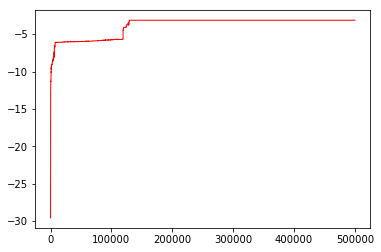

In [217]:
plt.plot(eval_rec_GA, score_rec_GA, markersize=.1,linewidth=1, linestyle="-", color ='r')
#plt.plot(A2, score_rec2, markersize=.1,linewidth=1, linestyle="-", color = 'r')
#plt.rcParams["figure.figsize"] = [20,9]
plt.show()

In [218]:
def draw(tour, X1, Y1):
    ax = plt.gca()    
    for i in range(0,50):
        item = tour[i]
        if i == 49:
            item_next = tour[0]
        else:
            item_next = tour[i+1]
        x1 = X1[item]
        y1 = Y1[item]
        x2 = X1[item_next]
        y2 = Y1[item_next]
        l = mlines.Line2D([x1,x2], [y1,y2])

        ax.add_line(l)

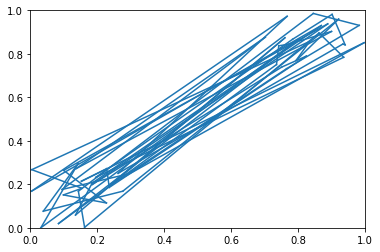

In [219]:
draw(best_GA, X1, Y1)

<Container object of 3 artists>

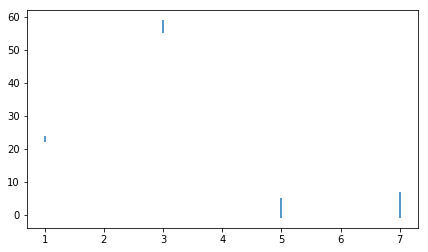

In [220]:
x = [1,2,3,4,5,6,7,8]
y = [23,37,57,42,2,5,3,24]
err = [1,2,3,4]
fig, ax = plt.subplots(figsize=(7, 4))

# standard error bars

ax.errorbar(x[::2], y[::2], yerr=err, linestyle='None')

In [221]:
def random_search(max_eval):
    best = init_random_tour(50)
    score = -1000
    n_eval = 0
    
    eval_rec = []
    score_rec = []
    
    while max_eval > n_eval:
        new = []
        new = init_random_tour(50)
        if objective_function(new) > score:
            best = new
            score = objective_function(best)
        n_eval += 1
        eval_rec.append(n_eval)
        score_rec.append(score)
        
    return (best, score, eval_rec, score_rec)
            

In [222]:
best_random, score_random, eval_rec_random, score_rec_random = random_search(1000)

In [223]:
print best_random, score_random

[1, 9, 34, 36, 35, 37, 12, 24, 0, 42, 17, 6, 10, 26, 41, 39, 46, 8, 38, 43, 48, 27, 44, 16, 13, 14, 18, 19, 23, 15, 28, 25, 32, 49, 4, 33, 29, 11, 40, 2, 22, 45, 47, 7, 20, 31, 5, 30, 3, 21] -18.8150322387


In [224]:
best_GA_main = []
score_GA_main = []
score_rec_GA_main = []

best_random_main = []
score_random_main = []
score_rec_random_main = []

best_hill_main = []
score_hill_main = []
score_rec_hill_main = []


for i in range(0,5):
    evals = 500000
    
    #GA
    
    start_time = time.time()
    a,b,c,d = GA_4(10, evals, 3, swapped_cities)
    end_time = time.time()
    print("GA --- %s seconds ---" % (end_time - start_time))
    best_GA = a
    score_GA = b
    eval_rec_GA = c
    score_rec_GA = d
    
    best_GA_main.append(best_GA)
    score_GA_main.append(score_GA)
    score_rec_GA_main.append(score_rec_GA)
    
    #RANDOM
    start_time = time.time()
    x,y,z,w = random_search(evals)
    end_time = time.time()
    print("Random --- %s seconds ---" % (end_time - start_time))
    
    best_random = x
    score_random = y
    eval_rec_random = z
    score_rec_random = w
    
    best_random_main.append(best_random)
    score_random_main.append(score_random)
    score_rec_random_main.append(score_rec_random)
    
    
    #HILL
    start_time = time.time()
    p,q,r,s = hillclimb_stochastic(init_function, reversed_sections_hill, objective_function, evals, 10 )
    end_time = time.time()
    print("Hill --- %s seconds ---" % (end_time - start_time))
    
    best_hill = p
    score_hill = q
    eval_rec_hill = r
    score_rec_hill = s
    high = score_rec_hill[len(eval_rec_hill)-1]
    
    for i in range(len(eval_rec_hill), evals):
        eval_rec_hill.append(i)
        score_rec_hill.append(high)
    
    best_hill_main.append(best_hill)
    score_hill_main.append(score_hill)
    score_rec_hill_main.append(score_rec_hill)
    

    
    

GA --- 3042.50019288 seconds ---
Random --- 15.8659629822 seconds ---
Hill --- 8.52325201035 seconds ---
GA --- 543.114339828 seconds ---
Random --- 17.0657289028 seconds ---
Hill --- 0.875916004181 seconds ---
GA --- 653.047065973 seconds ---
Random --- 17.0582439899 seconds ---
Hill --- 9.35108995438 seconds ---
GA --- 463.970114946 seconds ---
Random --- 17.0457069874 seconds ---
Hill --- 9.36633896828 seconds ---
GA --- 463.525038004 seconds ---
Random --- 17.0562770367 seconds ---
Hill --- 9.39744710922 seconds ---


In [225]:
GA_mean_scores = []
for i in range(0, evals):
    
    total_score = 0
    for j in range(0,5):
        total_score += score_rec_GA_main[j][i]
    GA_mean_scores.append(total_score/5)
GA_err = []
for i in range(0,evals,evals/50):
    error_GA = []
    for j in range(0,5):
        error_GA.append(score_rec_GA_main[j][i])
    GA_err.append(np.std(error_GA)/np.sqrt(5))


    
random_mean_scores = []
for i in range(0, evals):
    
    total_score = 0
    for j in range(0,5):
        total_score += score_rec_random_main[j][i]
    random_mean_scores.append(total_score/5)
random_err = []
for i in range(0,evals,evals/50):
    error_random = []
    for j in range(0,5):
        error_random.append(score_rec_random_main[j][i])
    random_err.append(np.std(error_random)/np.sqrt(5))

    

In [226]:
hill_mean_scores = []
for i in range(0, evals):
    
    total_score = 0
    for j in range(0,5):
        total_score += score_rec_hill_main[j][i]
    hill_mean_scores.append(total_score/5)
hill_err = []
for i in range(0,evals,evals/50):
    error_hill = []
    for j in range(0,5):
        error_hill.append(score_rec_hill_main[j][i])
    hill_err.append(np.std(error_hill)/np.sqrt(5))

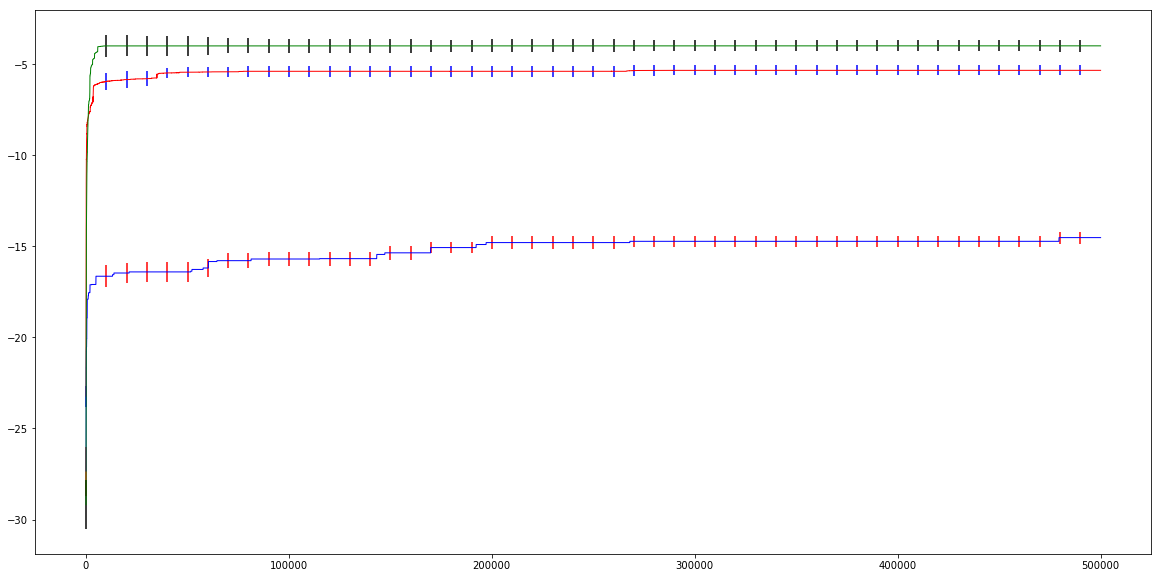

In [227]:

fig, ax = plt.subplots(figsize=(20, 10))
# standard error bars
ax.plot(eval_rec_GA, GA_mean_scores, markersize=.1, linewidth=1, linestyle="-", color ='r')
ax.errorbar(eval_rec_GA[::evals/50], GA_mean_scores[::evals/50], yerr=GA_err, linestyle='None', color = 'b')

ax.plot(eval_rec_random, random_mean_scores, markersize=.1, linewidth=1, linestyle="-", color ='b')
ax.errorbar(eval_rec_random[::evals/50], random_mean_scores[::evals/50], yerr=random_err, linestyle='None', color = 'r')

ax.plot(eval_rec_hill, hill_mean_scores, markersize=.1, linewidth=1, linestyle="-", color ='g')
ax.errorbar(eval_rec_hill[::evals/50], hill_mean_scores[::evals/50], yerr=random_err, linestyle='None', color = 'k')


#ax.set_ylim([30,50])
    
plt.show()

In [228]:
print score_GA_main

[[1, -5.7897935158203886], [0, -5.5613210780312432], [0, -5.7073880297771069], [0, -4.0990992417860301], [0, -5.5705578932607294]]


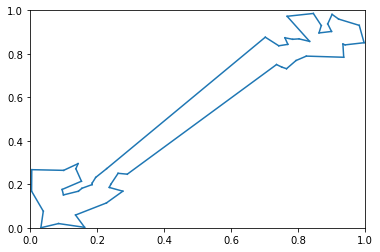

In [234]:
draw(best_hill_main[1], X1, Y1)

In [230]:
print len(eval_rec_hill)

500000


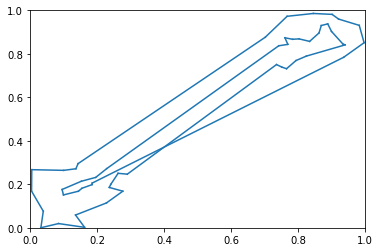

In [235]:
draw(best_GA_main[1], X1, Y1)

In [232]:
print score_hill_main


[-3.9301888083004575, -3.9066959261047876, -4.0246178342202903, -3.9684380733808609, -4.1762569083860228]


In [233]:
start_time = time.time()
p,q,r,s = hillclimb_stochastic(init_function, reversed_sections_hill, objective_function, evals, 10 )
end_time = time.time()
print("Hill --- %s seconds ---" % (end_time - start_time))
    
best_hill = p
score_hill = q
eval_rec_hill = r
score_rec_hill = s
    
best_hill_main.append(best_hill)
score_hill_main.append(score_hill)
score_rec_hill_main.append(score_rec_hill)

Hill --- 9.45346784592 seconds ---


[-5.8985655670040691, -6.5398488496340041, -5.9664829464706077, -6.0097595482175263, 36.960675260362933, 36.960182266889468, 36.962449858766028]


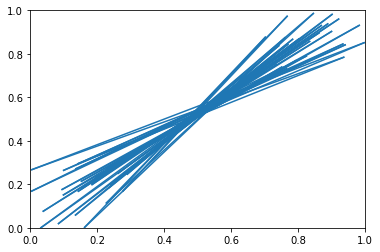

In [408]:
print score_hill_main
draw(a3, X1, Y1)